In [21]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
import numpy as np
from sklearn import metrics
import pylab as pl

## 1. Load and visualize the data

In [2]:
# matplotlib.use('TkAgg')
path = pathlib.Path('../data/lab2.csv')

In [3]:
df = pd.read_csv(path.absolute())
df.columns

Index(['a1', 'a2', 'class'], dtype='object')

# 1. Load and Visualize the Data

The data has already been loaded, the scatter plot with different class rendered by different color.  
As we can see from the graph, there is no clear boundary of these two classes, but the data points with class 1 are tend
to appear on the lower section to the left and class 0 data points are tends to appear on the upper side to the right.

[]

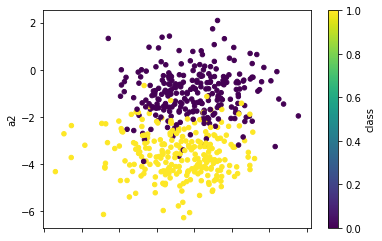

In [4]:
df.plot.scatter(x = 'a1', y = 'a2', c='class', colormap = 'viridis')

Other visualization of the dataset are shown as follow

The following figure is the kernel density of the two attribute(a1 and a2).  

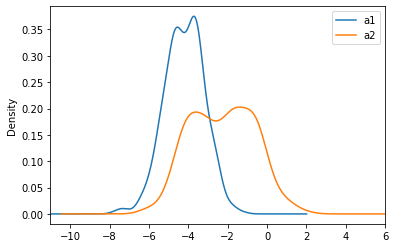

In [5]:
df.drop(columns=['class']).plot.kde(xlim=(-11,6))

The following figure shows that the box plot according to the two attributes.

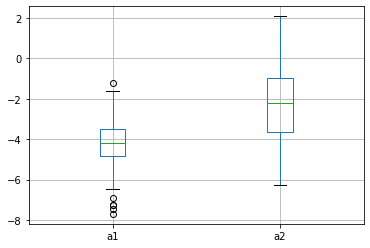

In [6]:
df.boxplot(column=['a1','a2'])

From the above two plots, we can see that these two attributes have basically close range with each other, which a1 is 
majorly distributed in the section of -6 to -2, and a2 is majorly distributed in the range of -6 to 2. This suggests that
we might want to do a linear transformation to each of these attributes to assure that they have exactly the same range,
so that distance based classifier (K-NN in this case) will not be defected in performance.

The follow two graphs shows the boxplot of each of the two attributes based on different class.
As we can see from the figures, the distribution of a1 doesn't change significantly given different class, 
and a2 changes significantly given different classes.

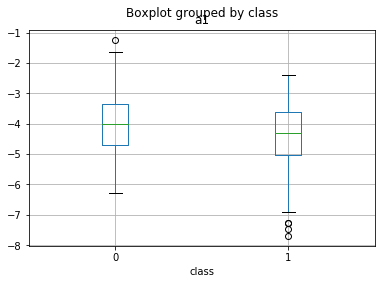

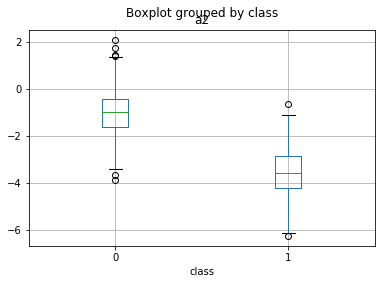

In [7]:
df.boxplot(column=['a1'], by='class')
df.boxplot(column=['a2'], by='class')

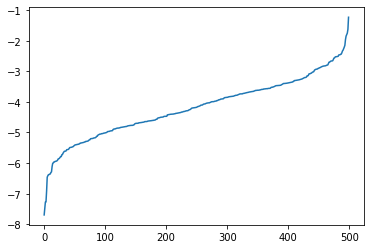

In [8]:
# see if they are linearly related 
a1_values = df.sort_values(by=['a1'])['a1'].values
plt.plot(range(len(a1_values)),a1_values)
plt.show()
# df.sort_values(by=['col1'])

# 2. prepare the data

We have 500 data samples from the dataset. These data are further be separated  using 
sklearn.model_selection.train_test_split method with test_size set to 0.2.  Resulting a training dataset at the size of 
400 data entries and testing dataset with 100 data entries.

In [9]:
x = df[['a1','a2']]
y = df['class']

In [38]:
x.head()

,a1,a2
0,-3.021065,-3.167397
1,-3.857654,-3.920570
2,-4.501169,-2.686552
3,-3.973198,-0.817386
4,-3.527329,-3.338574


In [39]:
y

0      1
1      1
2      1
3      0
4      1
      ..
495    1
496    1
497    0
498    1
499    1
Name: class, Length: 500, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [41]:
len(x_train)

400

In [42]:
len(y_train)

400

In [43]:
len(x_test)

100

## 3. Train a classifier and classify the test records

#### 3.1 Train the model with training data

In [11]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
param_grid=[{'n_neighbors':[1,2,3,4,5,6,7,8,10,12,14,16,20,24,28,32,64,128,256,360]}]
estimation_metric='accuracy'
clf_=GridSearchCV(neighbors.KNeighborsClassifier(),param_grid, cv=10,scoring=estimation_metric)
clf_.fit(x_train, y_train)
print(clf_.best_params_)

{'n_neighbors': 20}


#### 3.2 Determine the accuracy score using the training data

In [91]:
print(clf.score(x_train, y_train))
print(clf_.best_estimator_.score(x_train, y_train))

0.92
0.91


#### 3.3 Classify the test records using the trained classifier

In [46]:
y_predict = clf.predict(x_test)

recall is a measure of your model's completeness. Of all the points labeled 1, only 86% of the results returned were truly relevant. Of the entire dataset, 88% of the results were truly relevant.

In [47]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.90      0.92      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



#### 3.4 plot the predictions and trues side by side

<Figure size 432x288 with 0 Axes>

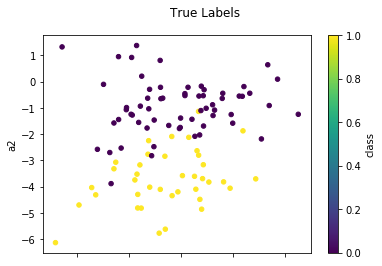

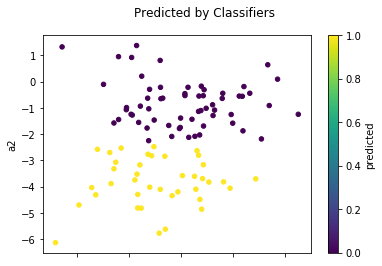

In [20]:
def plot_classification_result(mdl, x_test_, y_test_):
    y_predict_ = mdl.predict(x_test_)
    df = pd.DataFrame(data=x_test_, columns=['a1','a2'])
    df['class']=y_test_
    df['predicted']=y_predict_
    plt.figure()
    # plt.subplot(121)
    df.plot.scatter(x = 'a1', y = 'a2', c='class', colormap = 'viridis')
    pl.suptitle('True Labels')
    # plt.subplot(122)
    df.plot.scatter(x='a1',y='a2',c='predicted',colormap='viridis')
    pl.suptitle('Predicted by Classifiers')

    plt.show()

plot_classification_result(clf, x_test, y_test)
    
    